In [30]:
!pip install pandas emoji nltk seaborn matplotlib


Cleaned dataset saved to 'cleaned_emotion_dataset.csv'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Number of rows: 7102

Data Analysis Results:
--------------------------------------------------
Average word length: 4.25 characters

Top 10 most frequent words:
im: 644
like: 434
dont: 409
get: 358
amp: 349
people: 248
one: 248
know: 237
day: 228
time: 225


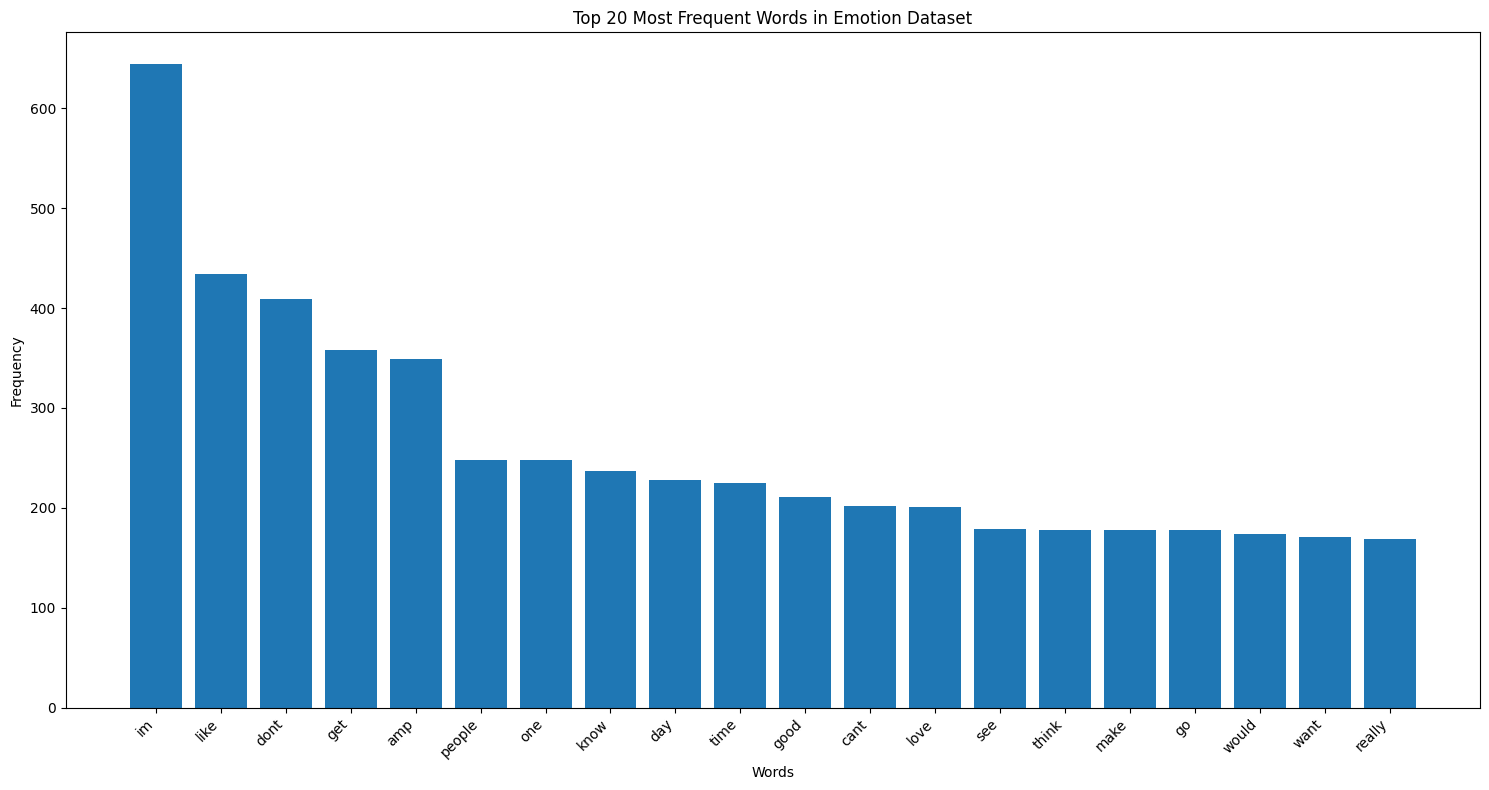

In [31]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def deEmojify(text):
    """Remove emojis from text"""
    if not isinstance(text, str):
        return ""
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', text)

def clean_text(text):
    """Clean text by removing emojis, special characters, and non-English characters"""
    if not isinstance(text, str):
        return ""
    
    # Remove emojis
    text = deEmojify(text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove escape sequences
    text = re.sub(r'\n|\r|\t|\\[a-z]+', ' ', text)
    
    # Remove hashtags and mentions
    text = re.sub(r'#\w+|@\w+', '', text)
    
    # Keep only ASCII characters
    text = ''.join(char for char in text if ord(char) < 128)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase and remove extra whitespace
    text = text.lower().strip()
    text = ' '.join(text.split())
    
    return text

def analyze_emotion_dataset():
    # Load and combine datasets
    train_df = pd.read_csv('./archive/emotion-labels-train.csv')
    test_df = pd.read_csv('./archive/emotion-labels-test.csv')
    val_df = pd.read_csv('./archive/emotion-labels-val.csv')
    
    df = pd.concat([train_df, test_df, val_df], ignore_index=True)
    
    # Clean the text
    df['cleaned_text'] = df['text'].apply(clean_text)
    
    # Save the cleaned dataset
    cleaned_df = df[['cleaned_text', 'label']]  # Keep only cleaned text and labels
    cleaned_df.to_csv('cleaned_emotion_dataset.csv', index=False)
    print(f"\nCleaned dataset saved to 'cleaned_emotion_dataset.csv'")
    print(f"Number of rows: {len(cleaned_df)}")
    
    # Calculate average word length
    word_lengths = []
    for text in df['cleaned_text']:
        words = text.split()
        if words:
            word_lengths.extend([len(word) for word in words])
    
    avg_word_length = sum(word_lengths) / len(word_lengths) if word_lengths else 0
    
    # Get word frequencies
    stop_words = set(stopwords.words('english'))
    all_words = []
    
    for text in df['cleaned_text']:
        words = text.split()
        all_words.extend([word for word in words 
                         if word not in stop_words 
                         and len(word) > 1])  # Filter out single characters
    
    # Get top words
    word_freq = Counter(all_words)
    top_10_words = word_freq.most_common(10)
    top_20_words = word_freq.most_common(20)
    
    # Create visualization
    plt.figure(figsize=(15, 8))
    words, counts = zip(*top_20_words)
    plt.bar(words, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top 20 Most Frequent Words in Emotion Dataset')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.tight_layout()
    
    return {
        'average_word_length': avg_word_length,
        'top_10_words': top_10_words,
        'cleaned_df': df,
        'plot': plt
    }

# Run the analysis
results = analyze_emotion_dataset()

# Print results
print("\nData Analysis Results:")
print("-" * 50)
print(f"Average word length: {results['average_word_length']:.2f} characters")
print("\nTop 10 most frequent words:")
for word, count in results['top_10_words']:
    print(f"{word}: {count}")

# Show the plot
results['plot'].show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raksh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top 10 most frequent words:
----------------------------------------
Word             Frequency
----------------------------------------
like                   434
dont                   409
get                    358
amp                    349
people                 248
one                    248
know                   237
day                    228
time                   225
good                   211


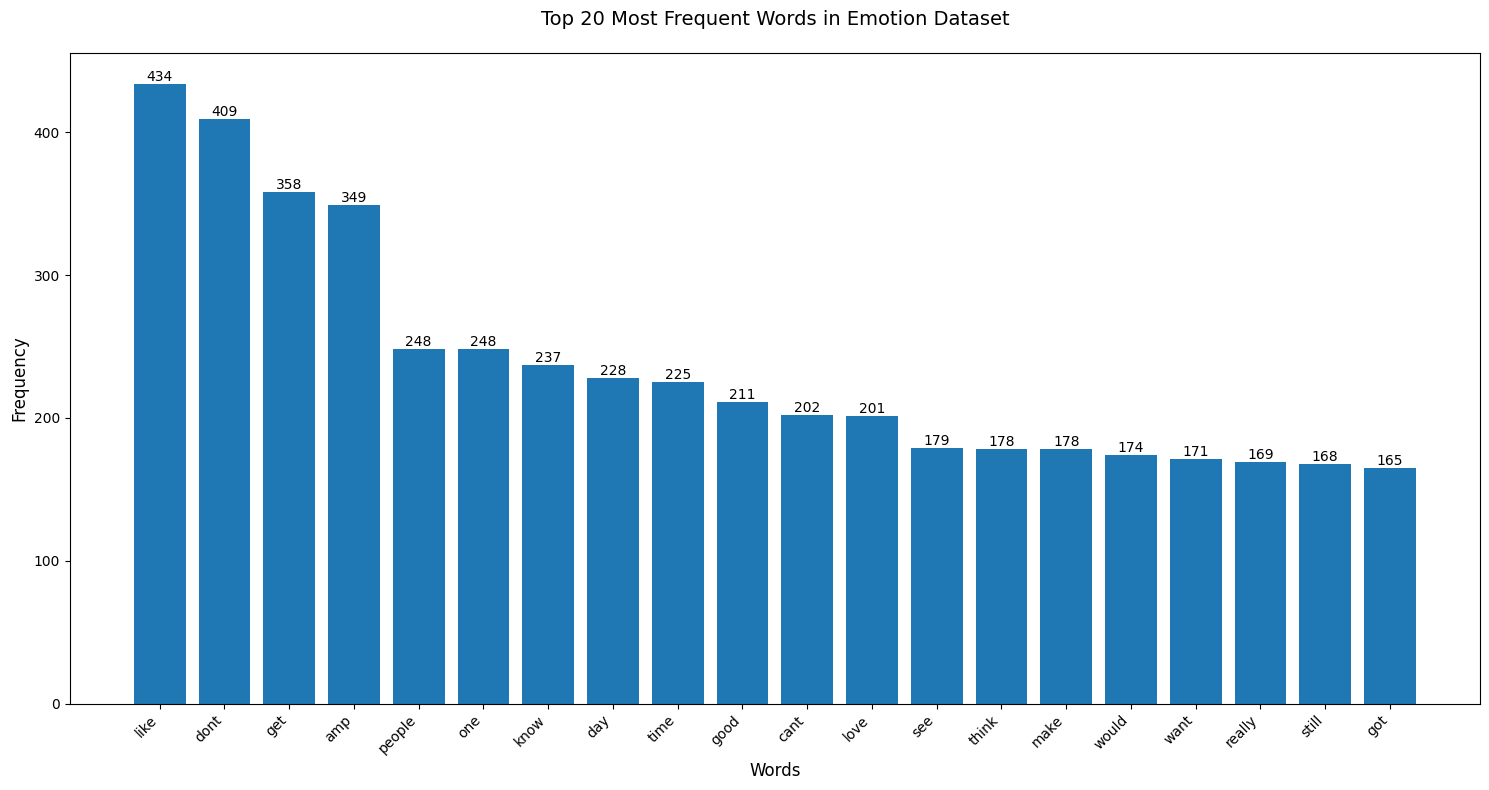

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def analyze_word_frequencies(file_path):
    """
    Analyze word frequencies in the cleaned emotion dataset and create visualizations.
    """
    # Read the cleaned dataset
    df = pd.read_csv(file_path)
    
    # Get stopwords
    stop_words = set(stopwords.words('english'))
    
    # Collect all words
    all_words = []
    for text in df['cleaned_text']:
        # Split text into words
        if isinstance(text, str):
            words = text.split()
            # Filter out stopwords and ensure words contain only letters
            valid_words = [word for word in words 
                         if word not in stop_words 
                         and word.isalpha()  # Ensures only alphabetic characters
                         and len(word) > 2]  # Filter out very short words
            all_words.extend(valid_words)
    
    # Get word frequencies
    word_freq = Counter(all_words)
    
    # Get top words
    top_10_words = word_freq.most_common(10)
    top_20_words = word_freq.most_common(20)
    
    # Create visualization
    plt.figure(figsize=(15, 8))
    words, counts = zip(*top_20_words)
    
    # Create bar plot
    bars = plt.bar(words, counts)
    
    # Customize the plot
    plt.title('Top 20 Most Frequent Words in Emotion Dataset', fontsize=14, pad=20)
    plt.xlabel('Words', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return {
        'top_10_words': top_10_words,
        'plot': plt
    }

# Run the analysis
results = analyze_word_frequencies('cleaned_emotion_dataset.csv')

# Print top 10 words
print("\nTop 10 most frequent words:")
print("-" * 40)
print(f"{'Word':<15} {'Frequency':>10}")
print("-" * 40)
for word, count in results['top_10_words']:
    print(f"{word:<15} {count:>10}")

# Show the plot
results['plot'].show()

In [33]:
ml_methods = [
    "Support Vector Machines (SVM)",
    "Logistic Regression",
    "Naive Bayes Algorithms",
    "Random Forests",
    "Deep Learning (LSTM, GRU, Transformer models like BERT)"
]
print("Machine Learning Methods for Emotion Classification:")
print("\n".join(ml_methods))

Machine Learning Methods for Emotion Classification:
Support Vector Machines (SVM)
Logistic Regression
Naive Bayes Algorithms
Random Forests
Deep Learning (LSTM, GRU, Transformer models like BERT)
